# Notes about simulation:

# Import packages and set settings

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../python_modules')
import plotting
import model_supp 
import model
import saving
import ramp_optimization

In [2]:
%matplotlib inline

# import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
# import pickle
import numpy as np
# import math
import pandas as pd
from scipy.integrate import odeint
# from scipy.integrate import solve_ivp
# import os
import itertools
from scipy.optimize import fsolve

In [3]:
# plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [10.0, 8.0]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['legend.fontsize'] = 14
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Load experimental data

In [7]:
exp_data, exp_time = model_supp.get_data(input='60perc')

wt_phospho_data, wt_nuc_data = exp_data
phospho_time, nuc_time = exp_time 

# Model Variables (Constants)

In [24]:
#M2a,b,c
labelnames = ['$- fb$', '$+ fb$', '$kb$',
              '$k_1$', '$k_3$', '$k_5$', '$s_1$',
              '$k_2$', '$k_4$', '$k_6$', '$d_1$',
              '$K_{M1}$', '$K_{M3}$', '$K_{M5}$',
              '$K_{M2}$', '$K_{M4}$', '$K_{M6}$']


minimums = [-4, -4, -4,
        -4, -4, -4, -4,
        -4, -4, -4, -4, 
        -4, -4, -4, 
        -4, -4, -4]

maximums = [ 4, 4, 4, 
        4, 4, 4, 4,
        4, 4, 4, 4, 
        4, 4, 4,
        4, 4, 4]

diff = np.asarray(maximums)-np.asarray(minimums)
dims = (diff, minimums)

gen = 1000
runs = 2000

dt = 0.1
steps = 601
time = np.linspace(0,dt*steps,steps)

MAP3K_t = model_supp.molarity_conversion(701)
MAP2K_t = model_supp.molarity_conversion(2282)
MAPK_t = model_supp.molarity_conversion(5984)
PTP_t = model_supp.molarity_conversion(118+400)

MAP3K = 0.05*MAP3K_t # estimated (so not 0)
MAP2K = 0.05975380333*MAP2K_t # from the biological data
MAPK = 0.00540042381*MAPK_t  # from the biological data
gly = 0.00001 # placeholder (so not 0)
PTP = model_supp.molarity_conversion(118+400) # start with all on

PTP = model_supp.molarity_conversion(118+400)

# M2b

##  191004_kb_M2b_hog1.py

**Notes** 

### Inputs

In [38]:
folder = 'C:/Users/sksuzuki/Desktop/killdevil/runs_for_paper/191004_kb_M2b_hog1/'

diff = np.asarray(maximums)-np.asarray(minimums)
dims = (diff, minimums)


M2b_fxns = model.Model(model.M2b_kb, model.simulate_t100a_experiment_M2a_kb)

model_folder = 'M2b/'
sim_id = 'M2b_f-hog1_'

### Gather simulated data

In [102]:
idx_top_M2b_hog1, top_params_M2b_hog1, top, plt_top, new_params, params_from_file, mse_M2b_hog1, last_mses_M2b_hog1 = model_supp.gather_simulated_data(folder, gen, runs, 0.01)
df_top_params = pd.DataFrame(top_params_M2b_hog1)
df_top_params.columns = labelnames
df_top_params_log = df_top_params.apply(np.log10)
df_top_params_log_M_M2b_hog1 = df_top_params_log.melt(var_name='param', value_name='vals')

Number of runs collected: 2000
Best MSE: 963.3687459551367
Mean MSE of top 5%: 1091.1427216945553


### Plot

In [106]:
select_top_M2b_hog1 = top_params_M2b_hog1.copy()
# select_top_M2_all = np.concatenate((select_top_[:7], select_top_M4[8:11]))

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

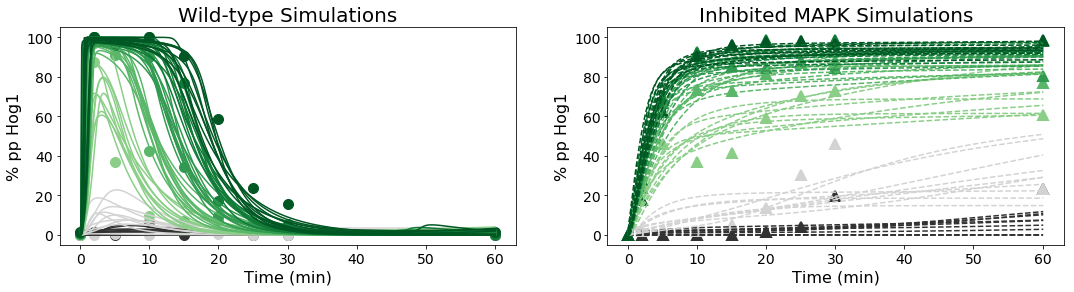

In [171]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials,  doses, time, 2, mapk_wt_data, mapk_t100a_data, mapk_time, save_fig=model_folder+sim_id+'hog1')
# plt.savefig("C:/Users/sksuzuki/Documents/Research/figures/simulations/hog1.png",dpi=150,bbox_inches='tight')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

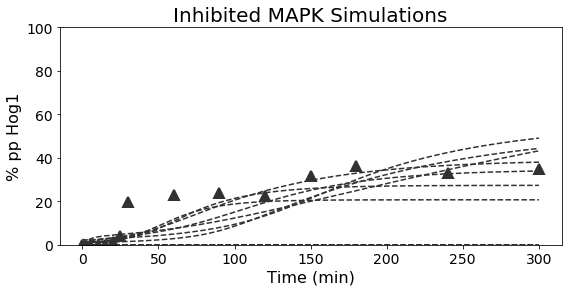

In [172]:
mapk_time_t100a_long = [0, 2, 5, 10, 15, 20, 25, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials, mapk_data_t100a_long[0], mapk_time_t100a_long, save_fig=model_folder+sim_id+'t100a_long')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

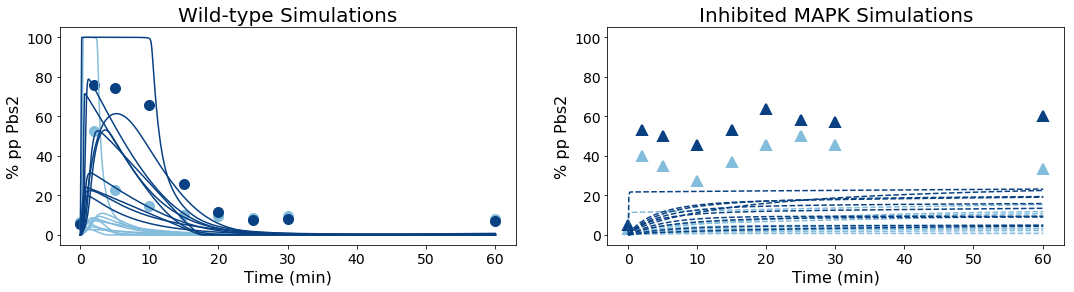

In [173]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials,  map2k_doses, time, 1, map2k_wt_data, map2k_t100a_data, mapk_time, save_fig=model_folder+sim_id+'pbs2')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

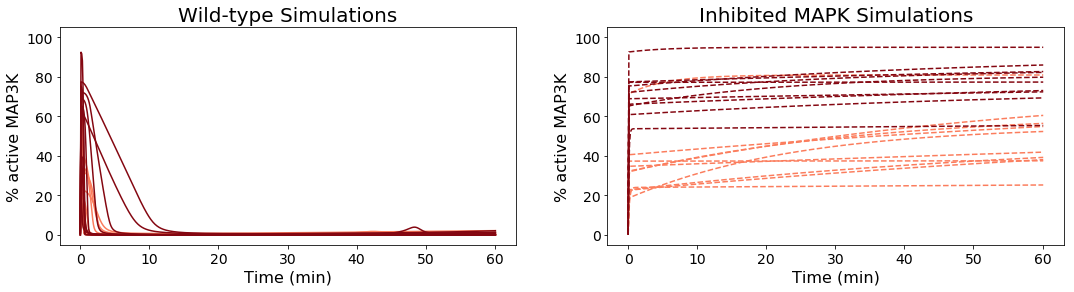

In [174]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials,  map2k_doses, time, 0, save_fig=model_folder+sim_id+'MAP3K')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

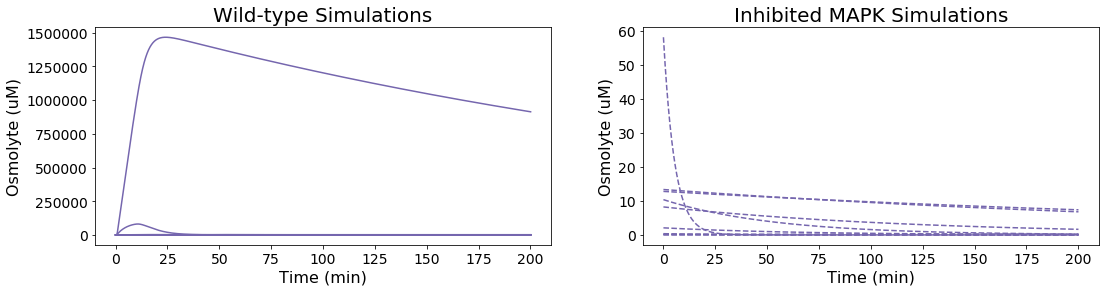

In [175]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials,  [350000], time, 3, save_fig=model_folder+sim_id+'Osmolytes')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


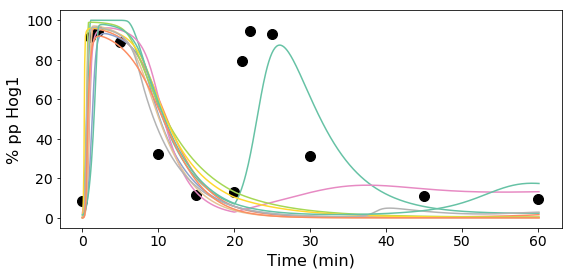

In [177]:
plotting.plt_ramp_behaviors(M2b_fxns, select_top_M2b_hog1, 10, params_constants, initials, time, 2, hog1_ramp_data, mapk_ramp_time, save_fig=model_folder+sim_id+'ramp')

<Figure size 720x576 with 0 Axes>

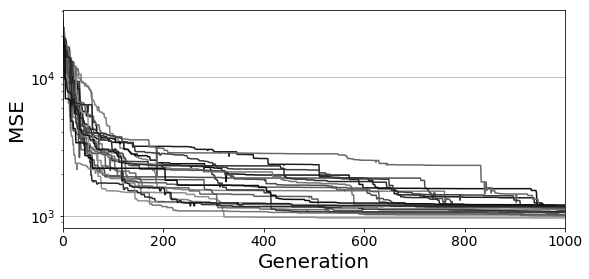

In [179]:
plotting.plt_mses_gen(gen,mse_M2b_hog1, idx_top_M2b_hog1, save_fig=model_folder+sim_id+'mses')

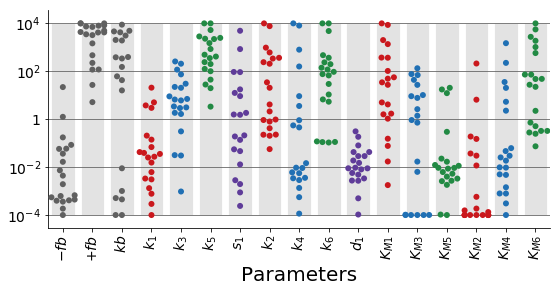

In [181]:
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_top_params_log_M_M2b_hog1, save_fig=model_folder+sim_id+'params')

In [182]:
mses_M2b_hog1 = model_supp.get_mse_stats(M2b_fxns, top_params_M2b_hog1, params_constants, initials, ptpD=False)
mses_M2b_hog1.head()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0          1           2          3          4          5   \
0  4.584886  95.108608  166.826745  50.247878   4.669949  33.511965   
1  3.178082  10.013827  178.399208  61.657450  27.041793  22.317379   
2  3.381438  20.616014  218.108380  31.937675   8.277294  21.378175   
3  6.312922  21.212110  187.022886  49.589515   9.252366   8.547228   
4  3.736693  42.313652  123.327915  79.952090  29.129413  54.012925   

          6          7           8           9           10         11  \
0  36.702925  93.207760  135.101820   87.927315   75.648433  55.195152   
1  90.989412  77.098001  136.064597  144.530688   92.390684  31.899762   
2  76.377047  70.234626  134.975049  104.865500   38.598040  52.912259   
3  68.288347  33.863221  132.757761   95.575312   48.923178  62.018986   
4  77.866142  49.052484  142.934989  146.617079  140.706346  91.984237   

          12          13           14           15           16           17  
0  44.302668   80.332400   301.946426   658.604607   982.240705   786.377969  
1  46.802384   71.179515   251.494048   970.465964  1456.753560  1926.861217  
2  70.773950  150.973930   415.749915  1300.800874  1525.317029  2140.690282  
3  88.876751  197.439704   224.757903  1009.301740  1435.444354  1787.522024  
4  13.349291   19.117046  1285.488221  1270.657677  2367.716575  1628.589284

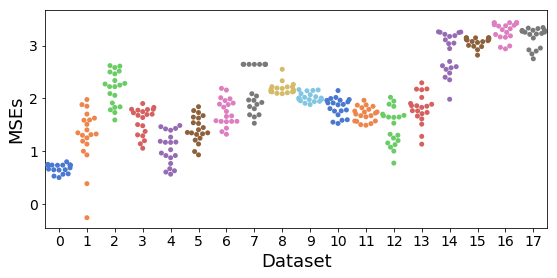

In [183]:
plotting.plt_mses_swarm(mses_M2b_hog1, save_fig='')

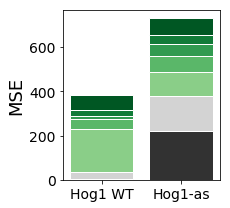

In [184]:
plotting.plt_mses(mses_M2b_hog1, (1,1, 0, 0, 0,0), size=(3,3), ptpD=False ,save_fig=model_folder+sim_id+'fit_mses')

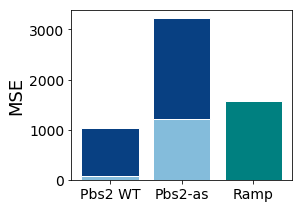

In [185]:
plotting.plt_mses(mses_M2b_hog1, (0,0, 1, 1, 1, 1), size=(4,3), ptpD=False ,save_fig=model_folder+sim_id+'predicted_mses')

$K_{M4}$  $k_3$       0.784701
$k_3$     $K_{M4}$    0.784701
$K_{M3}$  $k_3$       0.800286
$k_3$     $K_{M3}$    0.800286
          $k_4$       0.890703
$k_4$     $k_3$       0.890703
$k_6$     $K_{M6}$    0.940430
$K_{M6}$  $k_6$       0.940430
$K_{M2}$  $s_1$       0.984597
$s_1$     $K_{M2}$    0.984597
dtype: float64


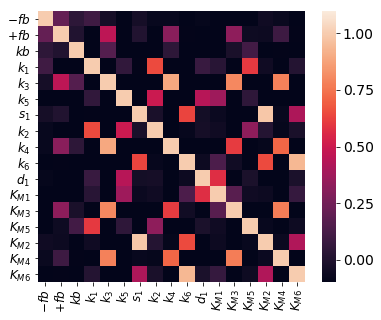

In [186]:
plotting.plt_corr(labelnames, df_top_params, save_fig=model_folder+sim_id+'corr')

### Save data

In [143]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_t100a', t100a=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [151]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_ramp', ramp=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


##  191014_kb_M2b.py

**Notes** 

- saved as the wrong date - 191010 should be 191014

### Inputs

In [7]:
folder = 'C:/Users/sksuzuki/Desktop/killdevil/runs_for_paper/191010_kb_M2b/'


model_folder = 'M2b/'
sim_id = 'M2b_f-all_'

### Gather simulated data

In [14]:
idx_top_M2b_all, top_params_M2b_all, top, plt_top, new_params, params_from_file, mse_M2b_all, last_mses_M2b_all = model_supp.gather_simulated_data(folder, gen, runs, 0.01)
df_top_params_M2b_all = pd.DataFrame(top_params_M2b_all)
df_top_params_M2b_all.columns = labelnames
df_top_params_log = df_top_params_M2b_all.apply(np.log10)
df_top_params_log_M_M2b_all = df_top_params_log.melt(var_name='param', value_name='vals')

Number of runs collected: 2080
Best MSE: 1684.365184168801
Mean MSE of top 5%: 1901.1734732806417


### Plot

In [15]:
select_top_M2b_all = top_params_M2b_all.copy()
# select_top_M2_all = np.concatenate((select_top_[:7], select_top_M4[8:11]))

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

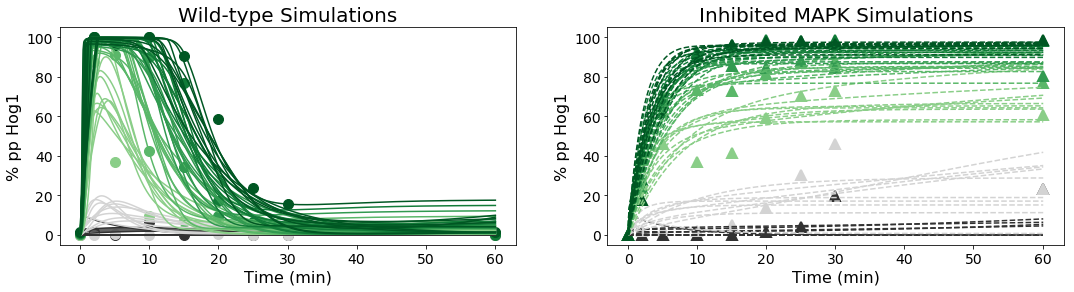

In [230]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants, initials,  doses, time, 2, mapk_wt_data, mapk_t100a_data, mapk_time, save_fig=model_folder+sim_id+'hog1')
# plt.savefig("C:/Users/sksuzuki/Documents/Research/figures/simulations/hog1.png",dpi=150,bbox_inches='tight')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

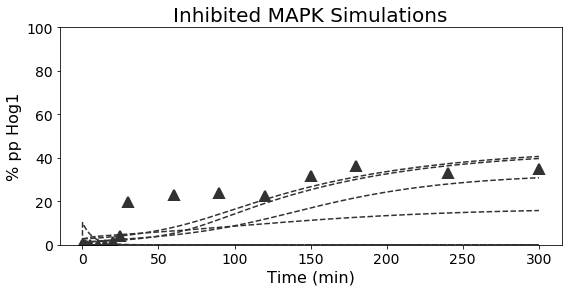

In [231]:
mapk_time_t100a_long = [0, 2, 5, 10, 15, 20, 25, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(M2b_fxns, select_top_M2b_all, 10, params_constants, initials, mapk_data_t100a_long[0], mapk_time_t100a_long, save_fig=model_folder+sim_id+'t100a_long')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

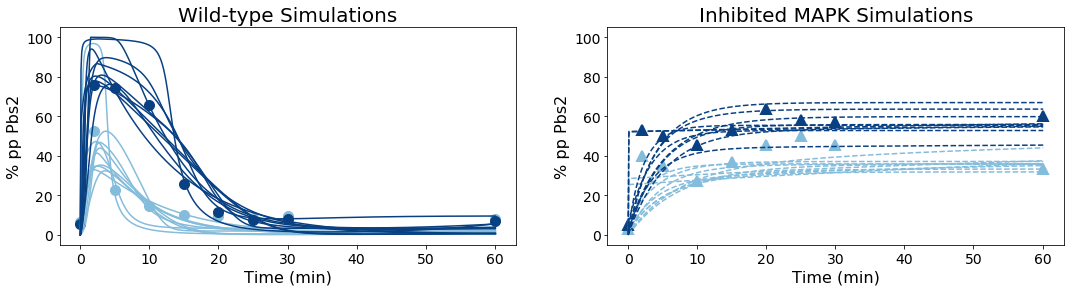

In [232]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants, initials,  map2k_doses, time, 1, map2k_wt_data, map2k_t100a_data, mapk_time, save_fig=model_folder+sim_id+'pbs2')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

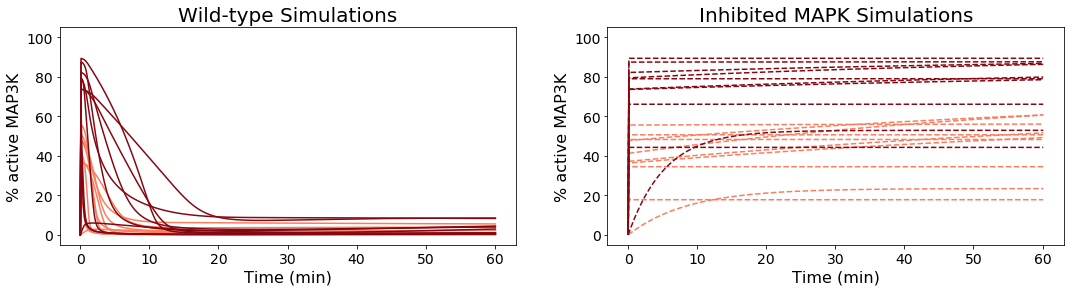

In [233]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants, initials,  map2k_doses, time, 0, save_fig=model_folder+sim_id+'MAP3K')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

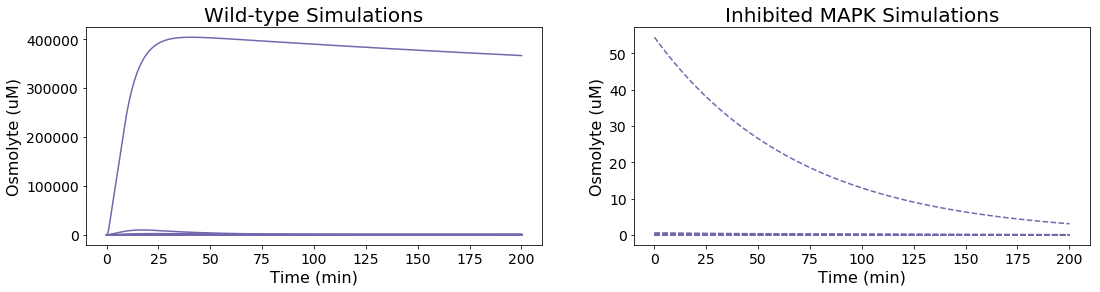

In [234]:
plotting.plt_param_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants, initials,  [350000], time, 3, save_fig=model_folder+sim_id+'Osmolytes')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


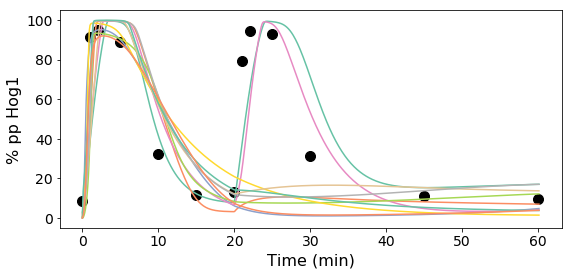

In [236]:
plotting.plt_ramp_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants, initials, time, 2, hog1_ramp_data, mapk_ramp_time, save_fig=model_folder+sim_id+'ramp')

<Figure size 720x576 with 0 Axes>

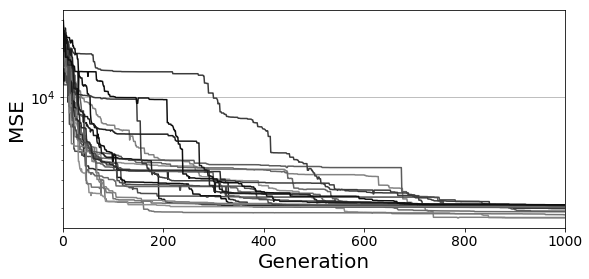

In [238]:
plotting.plt_mses_gen(gen,mse_M2b_all, idx_top_M2b_all, save_fig=model_folder+sim_id+'mses')

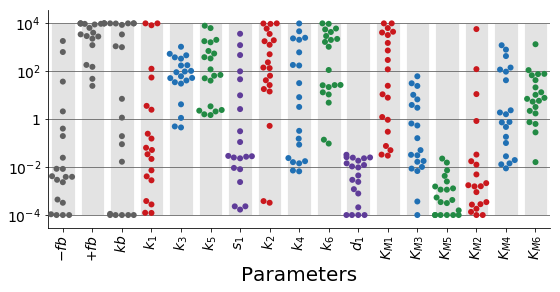

In [239]:
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_top_params_log_M_M2b_all, save_fig=model_folder+sim_id+'params')

In [241]:
mses_M2b_all = model_supp.get_mse_stats(M2b_fxns, top_params_M2b_all, params_constants, initials, ptpD=False)
mses_M2b_all.head()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0          1           2          3          4          5   \
0  7.618702  43.263333  280.128107  93.676552  74.355104  97.029488   
1  5.474878  66.558104  312.233759  42.188438   9.271242  64.680830   
2  5.474917  52.016095  139.486739  68.388006  32.499497  52.438736   
3  4.987860  59.535458  361.110490  64.853336  38.192607  77.918778   
4  5.474404  51.469186  235.726912  54.103408  12.091512  32.661336   

           6           7           8           9          10          11  \
0   72.008157   46.664153  131.526475  106.244386  32.413389  135.049876   
1  175.950954   45.571257  189.975578  113.955453  34.630616   72.539318   
2   80.140058  441.707534  165.017623   78.732464  69.272358   76.593193   
3   93.736986   59.809851  120.089190   84.898763  43.671374   63.851526   
4  102.911192  441.700232  127.913562   91.735418  90.323245   41.027700   

           12          13          14          15          16           17  
0  133.927454  278.238348   60.105686   91.525194   25.563375   608.196523  
1   85.774514  188.079347   58.914191   96.142126   65.604571  1743.764121  
2   12.014440   63.897543   57.259717  203.270857  143.580443  1856.170699  
3   38.074610  122.322485  241.265728  130.833668   23.180656   620.600064  
4   33.662878  142.323832   55.074683  211.299081  117.413462  1844.310886

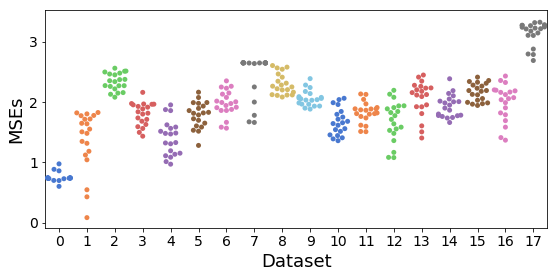

In [242]:
plotting.plt_mses_swarm(mses_M2b_all, save_fig='')

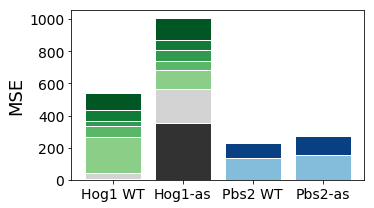

In [243]:
plotting.plt_mses(mses_M2b_all, (1,1, 1, 1, 0,0), size=(5,3), ptpD=False ,save_fig=model_folder+sim_id+'fit_mses')

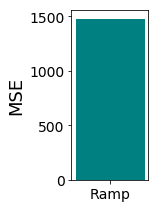

In [247]:
plotting.plt_mses(mses_M2b_all, (0,0, 0, 0, 1, 1), size=(2,3), ptpD=False ,save_fig=model_folder+sim_id+'predicted_mses')

$+ fb$    $k_3$       0.576308
$k_3$     $+ fb$      0.576308
$k_1$     $K_{M1}$    0.599241
$K_{M1}$  $k_1$       0.599241
$K_{M6}$  $k_6$       0.617703
$k_6$     $K_{M6}$    0.617703
$K_{M2}$  $k_4$       0.853115
$k_4$     $K_{M2}$    0.853115
$s_1$     $- fb$      0.994196
$- fb$    $s_1$       0.994196
dtype: float64


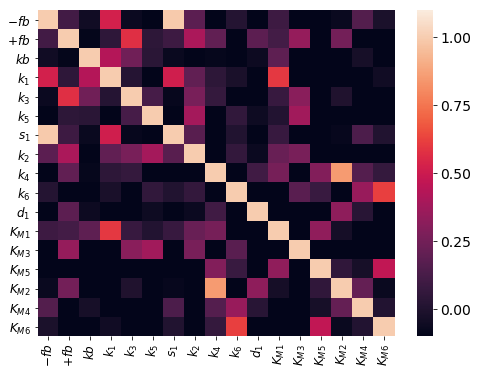

In [246]:
plotting.plt_corr(labelnames, df_top_params, save_fig=model_folder+sim_id+'corr')

### Save data

In [143]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_t100a', t100a=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [151]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_ramp', ramp=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# M2c

##  191004_kb_M2c_hog1.py

**Notes** 
- M4 model - mutual inhibition model, though i named the files M3. 

### Inputs

In [29]:
folder = 'C:/Users/sksuzuki/Desktop/killdevil/runs_for_paper/191004_kb_M2c_hog1/'

diff = np.asarray(maximums)-np.asarray(minimums)
dims = (diff, minimums)




# mapk_time_t100a_long = [0, 2, 5, 10, 15, 20, 25, 30, 60, 90, 120, 150, 180, 240, 300]

# labels = ['MAP3K','MAP2K','MAPK','gly', 'PTP']

M2c_fxns = model.Model(model.M2c_kb, model.simulate_t100a_experiment_M2a_, model.simulate_nopos_experiment_M2a)

model_folder = 'M2c/'
sim_id = 'M2c_f-hog1_'

### Gather simulated data

In [104]:
idx_top_M2c_hog1, top_params_M2c_hog1, top, plt_top, new_params, params_from_file, mse_M2c_hog1, last_mses_M2c_hog1 = model_supp.gather_simulated_data(folder, gen, runs, 0.01)
df_top_params = pd.DataFrame(top_params_M2c_hog1)
df_top_params.columns = labelnames
df_top_params_log = df_top_params.apply(np.log10)
df_top_params_log_M_M2c_hog1 = df_top_params_log.melt(var_name='param', value_name='vals')

Number of runs collected: 1999
Best MSE: 822.3971558904741
Mean MSE of top 5%: 1138.6109021396176


### Plot

In [105]:
select_top_M2c_hog1 = top_params_M2c_hog1.copy()
# select_top_M2_all = np.concatenate((select_top_[:7], select_top_M4[8:11]))

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


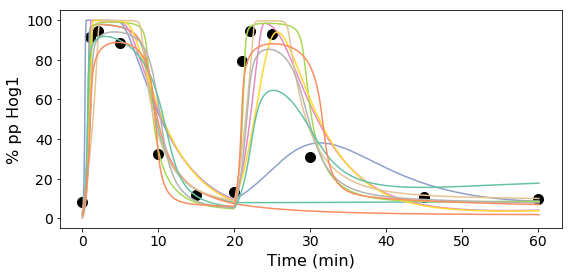

In [197]:
plotting.plt_ramp_behaviors(M2c_fxns, select_top_M2c_hog1, 10, params_constants, initials, time, 2, hog1_ramp_data, mapk_ramp_time, save_fig=model_folder+sim_id+'ramp')

<Figure size 720x576 with 0 Axes>

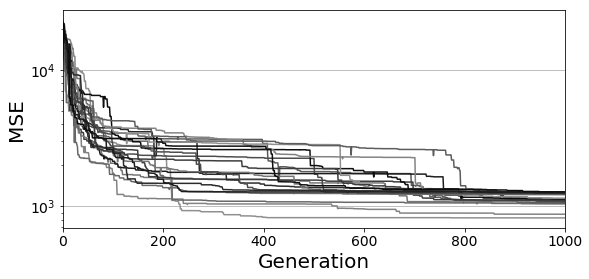

In [199]:
plotting.plt_mses_gen(gen,mse_M2c_hog1, idx_top_M2c_hog1, save_fig=model_folder+sim_id+'mses')

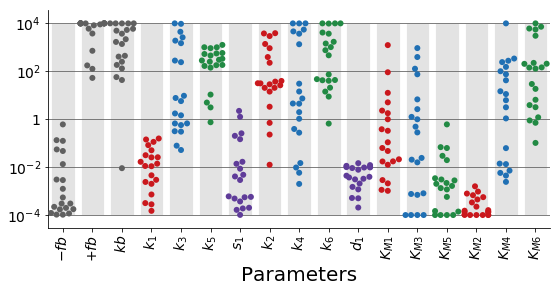

In [200]:
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_top_params_log_M_M2c_hog1, save_fig=model_folder+sim_id+'params')

In [201]:
mses_M2c_hog1 = model_supp.get_mse_stats(M2c_fxns, top_params_M2c_hog1, params_constants, initials, ptpD=False)
mses_M2c_hog1.head()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0          1           2          3          4          5   \
0  11.508969  60.009986   82.053837  11.021983   8.038939   4.647568   
1  19.396893  48.078233   59.752409  13.573431   4.565292   6.822862   
2   5.441254  35.976841  162.960385  45.548648  25.778408  67.848802   
3   4.745791  36.327594  339.866149  48.889810  14.203478  49.727345   
4   5.720111  24.451006  109.321016  17.773275  38.530835  26.735085   

          6           7           8           9           10         11  \
0  89.084674   54.129054  117.527848  144.540318  117.923966  65.621401   
1  85.291570  103.000417  137.156330  124.897315  115.866548  79.982967   
2  64.609815   97.157506  205.788696  129.365393   44.429159  53.131941   
3  35.747450  101.109913  121.272792   93.256695   50.476289  43.964804   
4  93.676695  126.241066  166.758316   96.179181   44.984029  64.751593   

          12          13           14           15           16           17  
0  23.727401   32.560757  1087.890644   226.719432   339.190842  1589.472803  
1  46.347422   30.462730  1411.679574   494.237595   734.814108  1782.476751  
2  40.589864   63.026062   589.795862   398.904304   672.007998  1265.889887  
3  33.685916   77.278949  1661.045624  1167.141735  2141.099725   526.060222  
4  70.610165  176.068142   114.988702   189.693416  1318.117133   169.661941

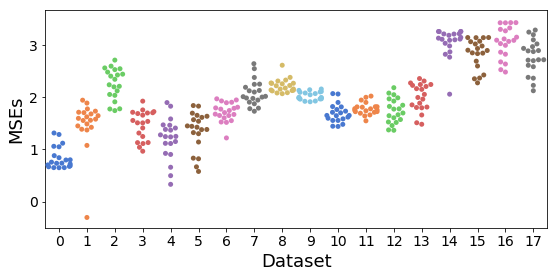

In [202]:
plotting.plt_mses_swarm(mses_M2c_hog1, save_fig='')

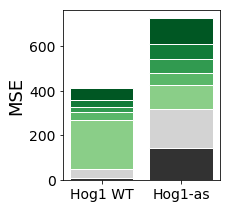

In [203]:
plotting.plt_mses(mses_M2c_hog1, (1,1, 0, 0, 0,0), size=(3,3), ptpD=False ,save_fig=model_folder+sim_id+'fit_mses')

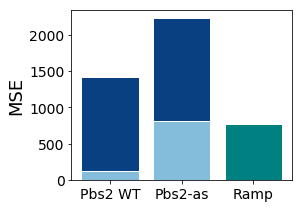

In [204]:
plotting.plt_mses(mses_M2c_hog1, (0,0, 1, 1, 1, 1), size=(4,3), ptpD=False ,save_fig=model_folder+sim_id+'predicted_mses')

$+ fb$    $k_5$       0.605463
$k_5$     $+ fb$      0.605463
$- fb$    $s_1$       0.629005
$s_1$     $- fb$      0.629005
$k_6$     $k_2$       0.792034
$k_2$     $k_6$       0.792034
          $K_{M2}$    0.814501
$K_{M2}$  $k_2$       0.814501
$k_1$     $kb$        0.827684
$kb$      $k_1$       0.827684
dtype: float64


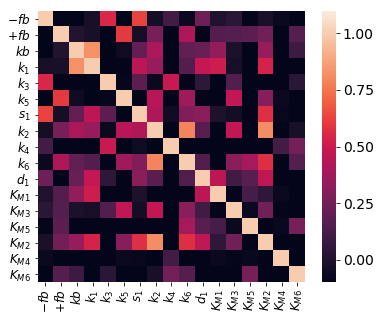

In [205]:
plotting.plt_corr(labelnames, df_top_params, save_fig=model_folder+sim_id+'corr')

### Save data

In [143]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_t100a', t100a=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [151]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_ramp', ramp=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


##  191010_kb_M2c.py

**Notes** 

### Inputs

In [16]:
folder = 'C:/Users/sksuzuki/Desktop/killdevil/runs_for_paper/191010_kb_M2c/'

M2c_fxns = model.Model(model.M2c, model.simulate_t100a_experiment_M2a)

labelnames = ['$- fb$', '$+ fb$', '$kb$',
              '$k_1$', '$k_3$', '$k_5$', '$s_1$',
              '$k_2$', '$k_4$', '$k_6$', '$d_1$',
              '$K_{M1}$', '$K_{M3}$', '$K_{M5}$',
              '$K_{M2}$', '$K_{M4}$', '$K_{M6}$']


minimums = [-4, -4, -4,
        -4, -4, -4, -4,
        -4, -4, -4, -4, 
        -4, -4, -4, 
        -4, -4, -4]

maximums = [ 4, 4, 4, 
        4, 4, 4, 4,
        4, 4, 4, 4, 
        4, 4, 4,
        4, 4, 4]

diff = np.asarray(maximums)-np.asarray(minimums)
dims = (diff, minimums)

model_folder = 'M2c/'
sim_id = 'M2c_f-all_'

### Gather simulated data

In [17]:
idx_top_M2c_all, top_params_M2c_all, top, plt_top, new_params, params_from_file, mse_M2c_all, last_mses_M2c_all = model_supp.gather_simulated_data(folder, 1000, runs, 0.01)
df_top_params = pd.DataFrame(top_params_M2c_all)
df_top_params.columns = labelnames
df_top_params_log = df_top_params.apply(np.log10)
df_top_params_log_M_M2c_all = df_top_params_log.melt(var_name='param', value_name='vals')

Number of runs collected: 2386
Best MSE: 1802.850666359431
Mean MSE of top 5%: 2035.7472010902634


### Plot

In [18]:
select_top_M2c_all = top_params_M2c_all.copy()
# select_top_M2_all = np.concatenate((select_top_[:7], select_top_M4[8:11]))

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

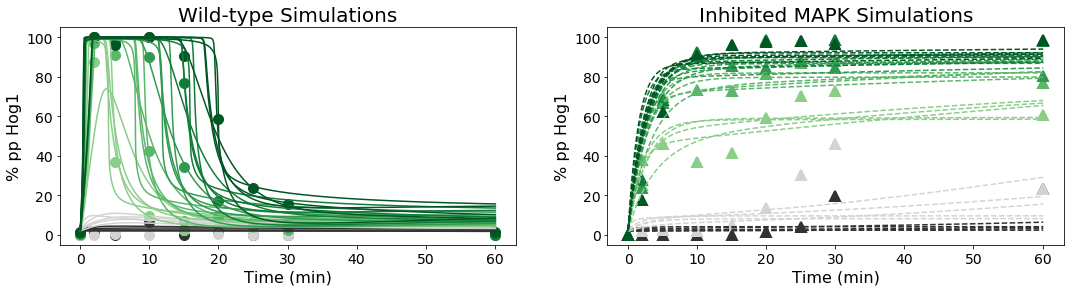

In [355]:
plotting.plt_param_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants1, initials1,  doses, time, 2, mapk_wt_data, mapk_t100a_data, mapk_time)
# plt.savefig("C:/Users/sksuzuki/Documents/Research/figures/simulations/hog1.png",dpi=150,bbox_inches='tight')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

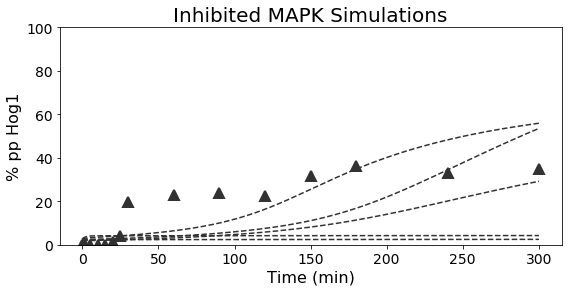

In [356]:
mapk_time_t100a_long = [0, 2, 5, 10, 15, 20, 25, 30, 60, 90, 120, 150, 180, 240, 300]

plotting.plt_t100a_long(M2c_fxns, select_top_M2c_all, 5, params_constants, initials, mapk_data_t100a_long[0], mapk_time_t100a_long, save_fig=model_folder+sim_id+'t100a_long')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

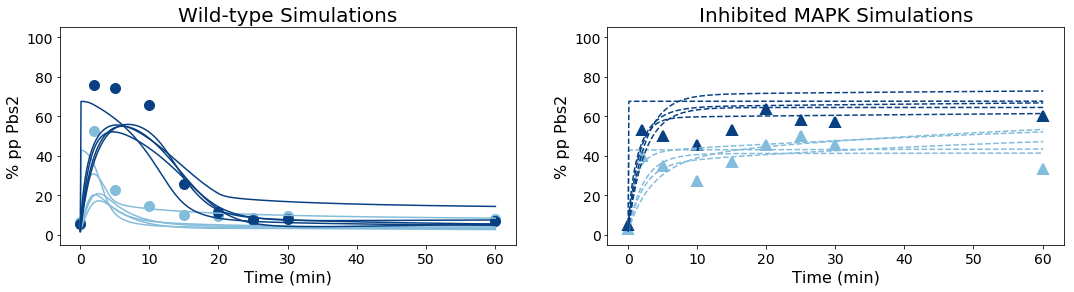

In [357]:
plotting.plt_param_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants, initials,  map2k_doses, time, 1, map2k_wt_data, map2k_t100a_data, mapk_time, save_fig=model_folder+sim_id+'pbs2')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

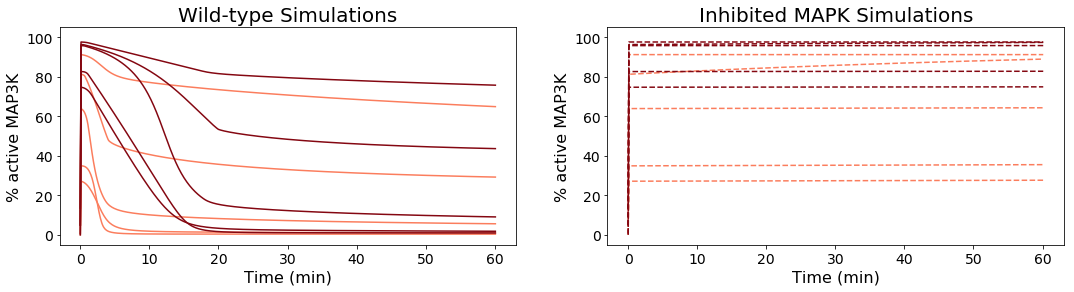

In [272]:
plotting.plt_param_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants, initials,  map2k_doses, time, 0, save_fig=model_folder+sim_id+'MAP3K')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

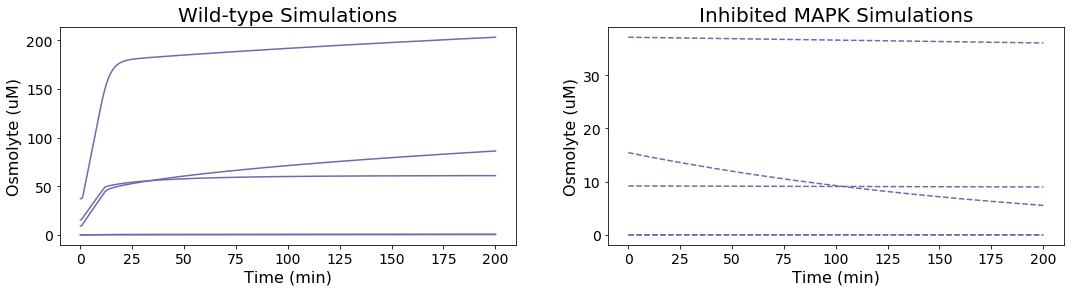

In [273]:
plotting.plt_param_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants, initials,  [350000], time, 3, save_fig=model_folder+sim_id+'Osmolytes')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


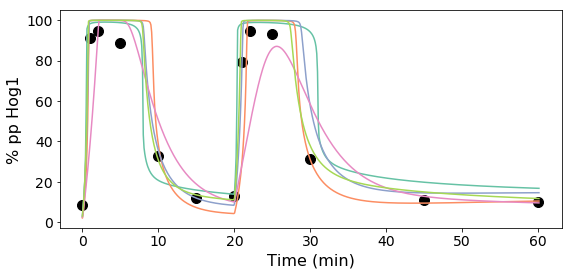

In [358]:
plotting.plt_ramp_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants, initials, time, 2, hog1_ramp_data, mapk_ramp_time, save_fig=model_folder+sim_id+'ramp')

<Figure size 720x576 with 0 Axes>

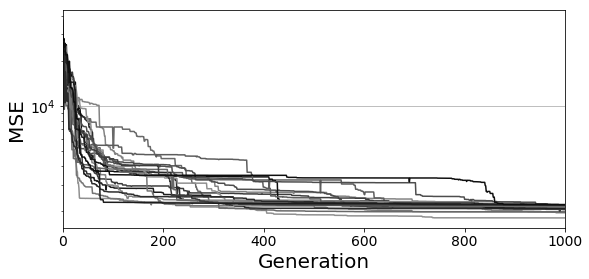

In [260]:
plotting.plt_mses_gen(gen,mse_M2c_all, idx_top_M2c_all, save_fig=model_folder+sim_id+'mses')

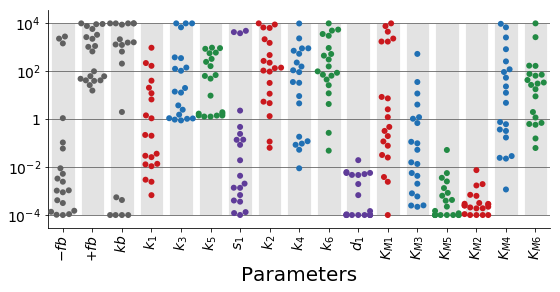

In [261]:
plotting.plt_param_ranges(labelnames, 'M2a', dims, df_top_params_log_M_M2c_all, save_fig=model_folder+sim_id+'params')

In [262]:
mses_M2c_all = model_supp.get_mse_stats(M2c_fxns, select_top_M2c_all, params_constants, initials, ptpD=False)
mses_M2c_all.head()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)


0          1           2          3          4          5   \
0   6.327707  40.877438   59.798231  95.499557  70.366891  96.306700   
1   5.534601  27.561781  294.099727  39.898174  15.931014  46.837833   
2  10.893616  51.447398   39.158687  42.050799  46.036466  28.612286   
3   5.368290   0.545520  226.198711  20.764874   2.802941   7.564917   
4   5.504743  25.088604   52.986564  57.231944  58.705442  43.083612   

          6           7           8           9          10          11  \
0  34.701250  158.870469  182.457230  103.903730  39.306015  105.909857   
1  19.754180  372.745147  249.059839  120.230458  24.838937   70.975444   
2  60.365161  329.242968  232.090952  133.308478  36.706149  105.417528   
3  22.416850  440.125814  398.193038  106.193419  29.017014   44.797997   
4  61.562585  441.690234  252.115473  111.893430  28.251210   56.117547   

           12          13          14         15          16          17  
0  134.134135  221.117788  215.087919  88.403031   91.695696  373.687802  
1   86.698247  148.208198  125.196782  59.622825  166.555817  686.695537  
2  118.277882  193.938874  237.671333  68.276036   94.045124   62.694145  
3   68.675362  122.069233  202.002481  48.814457   73.325437  626.926895  
4   51.819562  105.141379  333.983526  85.420569  158.003739  331.578179

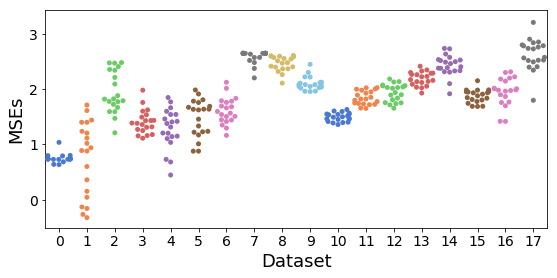

In [263]:
plotting.plt_mses_swarm(mses_M2c_all, save_fig='')

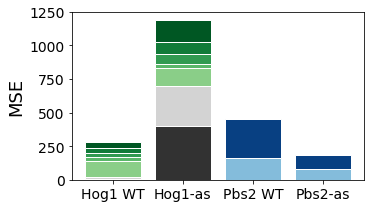

In [264]:
plotting.plt_mses(mses_M2c_all, (1,1, 1, 1, 0,0), size=(5,3), ptpD=False ,save_fig=model_folder+sim_id+'fit_mses')

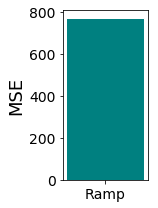

In [266]:
plotting.plt_mses(mses_M2c_hog1, (0,0, 0, 0, 1, 1), size=(2,3), ptpD=False ,save_fig=model_folder+sim_id+'predicted_mses')

$k_1$     $s_1$       0.594116
$s_1$     $k_1$       0.594116
$K_{M1}$  $kb$        0.657247
$kb$      $K_{M1}$    0.657247
$k_1$     $K_{M1}$    0.775277
$K_{M1}$  $k_1$       0.775277
$- fb$    $s_1$       0.973365
$s_1$     $- fb$      0.973365
$k_5$     $+ fb$      0.988809
$+ fb$    $k_5$       0.988809
dtype: float64


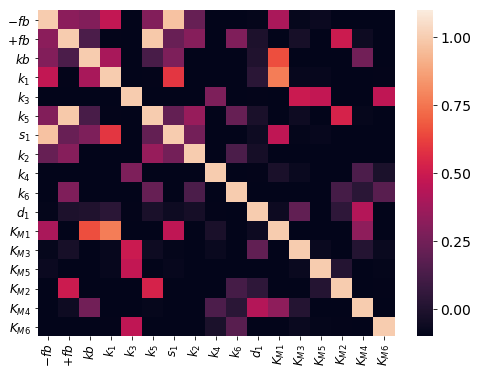

In [267]:
plotting.plt_corr(labelnames, df_top_params, save_fig=model_folder+sim_id+'corr')

### Save data

In [143]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_t100a', t100a=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [151]:
# save_sim_data(select_top_M4, doses, 2, path='C:/Users/sksuzuki/Documents/Research/figures/paper1/unsorted/', sim_name='M4_ramp', ramp=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# M4

## Model Constant Params

In [417]:

# MAP3K_t = molarity_conversion(701)
# MAP2K_t = molarity_conversion(2282)
# MAPK_t = molarity_conversion(5984)
# PTP_t = molarity_conversion(118+400)

# MAP3K = 0.05*MAP3K_t # estimated (so not 0)
# MAP2K = 0.05975380333*MAP2K_t # from the biological data
# MAPK = 0.00540042381*MAPK_t  # from the biological data
# gly = 0.00001 # placeholder (so not 0)
# PTP = molarity_conversion(118+400) # start with all on

# PTP = molarity_conversion(118+400)



# s = [0, 50000, 150000, 250000, 350000, 450000, 550000]


labelnames = ['$- fb$', '$- Hog1$','$- PTP$','$kb$',
              '$k_1$', '$k_3$', '$k_5$', '$s_1$', '$k_9$',
              '$k_2$', '$k_4$', '$k_6$','$d_1$', '$k_{10}$',
              '$K_{M1}$', '$K_{M3}$', '$K_{M5}$', '$K_{M9}$',
              '$K_{M2}$', '$K_{M4}$', '$K_{M6}$', '$K_{M10}$']

minimums = [-4, -4, -4, -4, 
        -4, -4, -4, -4, -4, -4,
        -4, -4, -4, -4, -4,
        -4, -4, -4, -4,
        -4, -4, -4]

maximums = [ 4,  4, 8, 4, 
        4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4,
        4, 4, 4, 4,
        4, 4, 4]

diff = np.asarray(maximums)-np.asarray(minimums)
dims = (diff, minimums)

# fb = 1
# t100a_fb = 0

initials2 = [MAP3K, MAP2K, MAPK, gly, PTP]
# params_constants = [MAP3K_t, MAP2K_t, MAPK_t, PTP_t] 
params_constants2 = [MAP3K_t, MAP2K_t, MAPK_t, 1, PTP_t] 


# doses = [0, 50, 150, 250, 350, 450, 550]
# map2k_doses = [150, 550]

doses = [0, 50000, 150000, 250000, 350000, 450000, 550000]
map2k_doses = [150000, 550000]

mapk_time_t100a_long = [0, 2, 5, 10, 15, 20, 25, 30, 60, 90, 120, 150, 180, 240, 300]

labels = ['MAP3K','MAP2K','MAPK','gly', 'PTP']

M4_fxns = model.Model(model.M4, model.simulate_t100a_experiment_M4, model.simulate_nopos_experiment_M4)

if len(labelnames) == len(diff):
    print('Params and labels match')

Params and labels match


### Inputs

In [336]:
folder = 'C:/Users/sksuzuki/Desktop/killdevil/runs_for_paper/190926_kb_M4_long/'

gen = 2000
runs = 2000

model_folder = 'M4/'
sim_id = 'M4_f-all_'

### Gather simulated data

In [339]:
idx_top_M4, top_params_M4, top, plt_top, new_params, params_from_file, mse_M4, last_mses_M4 = model_supp.gather_simulated_data(folder, 2000, runs, 0.01)
df_top_params = pd.DataFrame(top_params_M4)
df_top_params.columns = labelnames
df_top_params_log = df_top_params.apply(np.log10)
df_top_params_log_M_M4 = df_top_params_log.melt(var_name='param', value_name='vals')

Number of runs collected: 1753
Best MSE: 2665.709966122509
Mean MSE of top 5%: 3074.0871365281923


### Plot

In [ ]:
plt.plot([for idx in idx_top_M4])

In [341]:
select_top_M4 = top_params_M4.copy()
# select_top_M4 = np.concatenate((select_top_M4[:7], select_top_M4[8:11]))
# select_top_M4 = select_top_M4[:8]

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

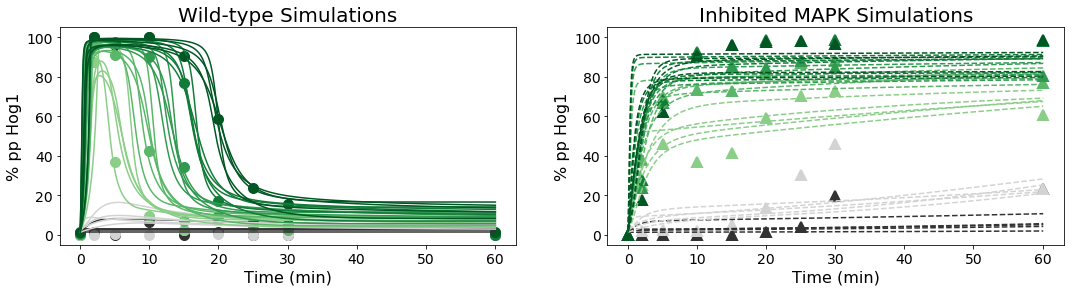

In [342]:
plotting.plt_param_behaviors(M4_fxns, select_top_M4, 5, params_constants2, initials2,  doses, time, 2, mapk_wt_data, mapk_t100a_data, mapk_time)
# plt.savefig("C:/Users/sksuzuki/Documents/Research/figures/simulations/hog1.png",dpi=150,bbox_inches='tight')

# Ramp generator

In [26]:
initials1 = [MAP3K, MAP2K, MAPK, gly]
params_constants1 = [MAP3K_t, MAP2K_t, MAPK_t, 1] 


## M2c vs. M4 - all

[97143.59561641766, [150000, 100000, 100000, 75000, 75000, 25000, 0]]


<Figure size 720x576 with 0 Axes>

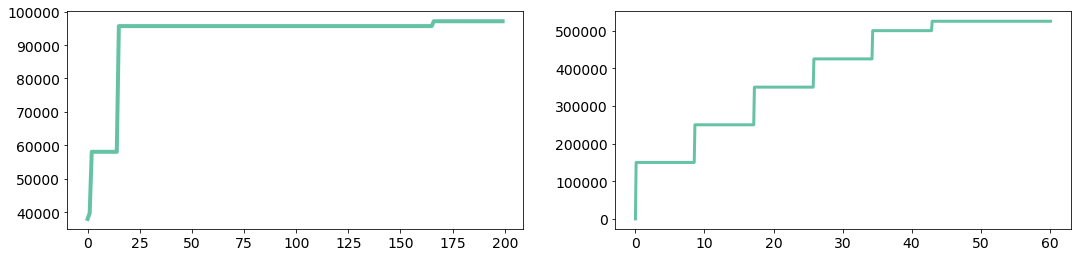

In [471]:
mut_inhib, averages_mut_inhib = ramp_optimization.get_differentiating_ramp(200, time, select_top_M2c_all[:2], M2c_fxns, initials1, params_constants1, 
                                           select_top_M4[:1], M4_fxns, initials2, params_constants2)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)


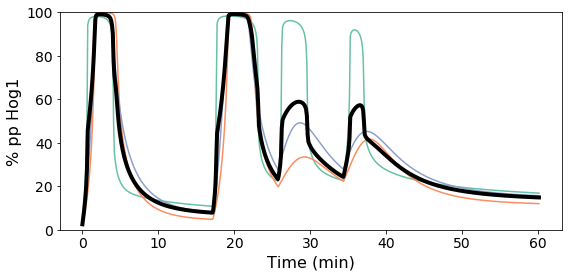

In [468]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 2, params_constants1, initials1, time,
                            mut_inhib, averages_mut_inhib[0],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


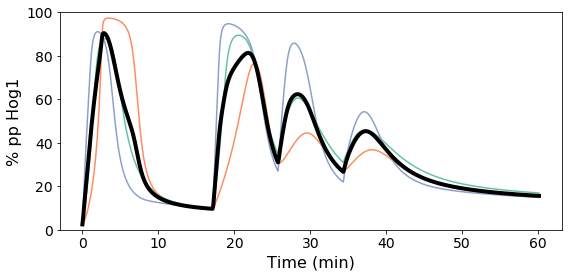

In [467]:
plotting.plt_rand_behaviors(M4_fxns, select_top_M4, 1, params_constants2, initials2, time,
                            mut_inhib, averages_mut_inhib[1],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[21200.671515849, [150000, 175000, 25000, 125000, 0, 25000, 0, 25000]]


<Figure size 720x576 with 0 Axes>

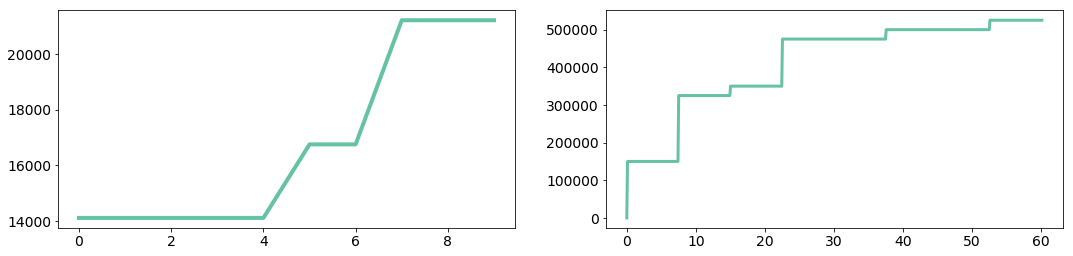

In [278]:
mut_inhib2, averages_mut_inhib2 = ramp_optimization.get_differentiating_ramp(100, time, select_top_M2c_all[:5], M2c_fxns, initials1, params_constants1, 
                                           select_top_M4[:5], M4_fxns, initials2, params_constants2)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


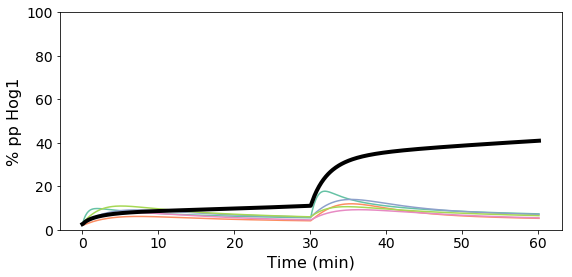

In [430]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants1, initials1, time,
                            mut_inhib2, averages_mut_inhib2[0],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


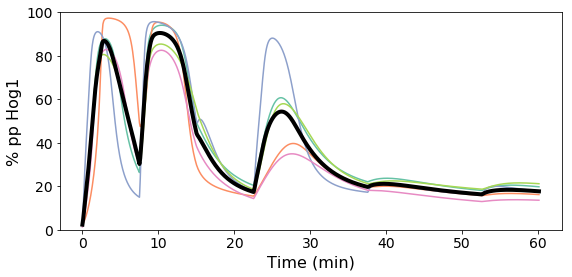

In [344]:
plotting.plt_rand_behaviors(M4_fxns, select_top_M4, 5, params_constants2, initials2, time,
                            mut_inhib2, averages_mut_inhib2[1],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[34938.86270322532, [50000, 50000]]


<Figure size 720x576 with 0 Axes>

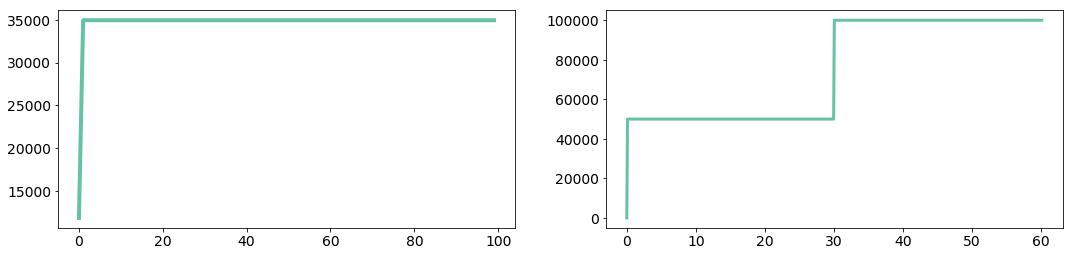

In [392]:
mut_inhib2, averages_mut_inhib2 = ramp_optimization.get_differentiating_ramp(100, time, select_top_M2c_all[:5], M2c_fxns, initials1, params_constants1, 
                                           select_top_M4[:5], M4_fxns, initials2, params_constants2, t100a=True)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


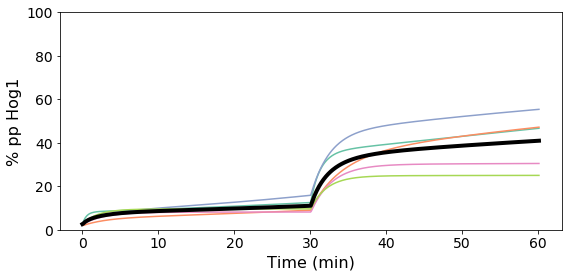

In [393]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants1, initials1, time,
                            mut_inhib2, averages_mut_inhib2[0], t100a=True,
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


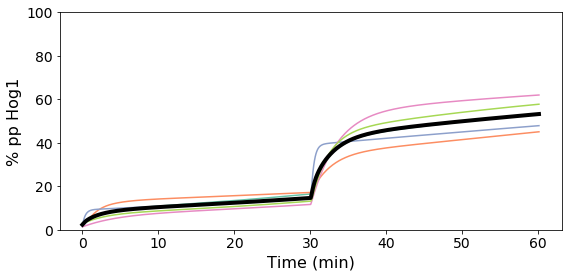

In [394]:
plotting.plt_rand_behaviors(M4_fxns, select_top_M4, 5, params_constants2, initials2, time,
                            mut_inhib2, averages_mut_inhib2[1], t100a=True,
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[6675.579297728721, [100000, 425000, 0, 0, 0, 0, 0, 0, 0, 0]]


<Figure size 720x576 with 0 Axes>

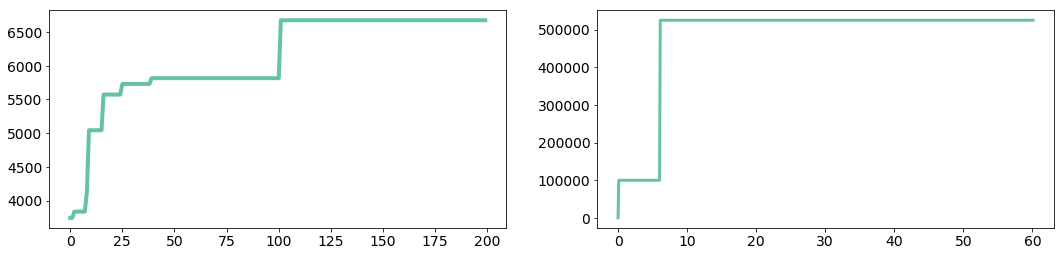

In [459]:
no_pos, averages_no_pos = ramp_optimization.get_differentiating_ramp(200, time, select_top_M2c_all[:5], M2c_fxns, initials1, params_constants1, 
                                           select_top_M4[:5], M4_fxns, initials2, params_constants2, selection='nopos')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


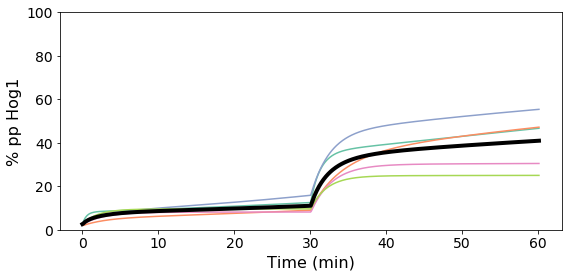

In [393]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 5, params_constants1, initials1, time,
                            no_pos, averages_no_pos[0], selection='nopos',
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


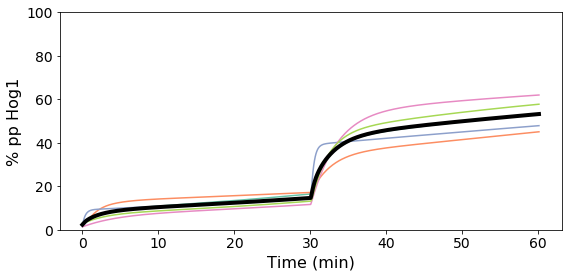

In [394]:
plotting.plt_rand_behaviors(M4_fxns, select_top_M4, 5, params_constants2, initials2, time,
                            no_pos, averages_no_pos[1], selection='nopos',
                            save_fig='')

### try different ramps

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


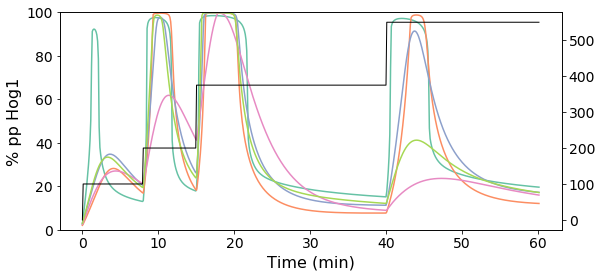

In [409]:
plotting.plt_man_behaviors(M2c_fxns, select_top_M2c_all[:5], 20, params_constants1, initials1, time, 2)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


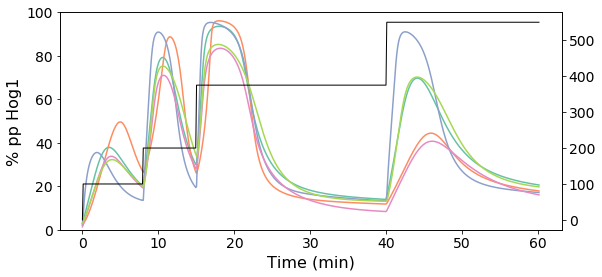

In [410]:
plotting.plt_man_behaviors(M4_fxns, select_top_M4[:5], 20, params_constants2, initials2, time, 2)

#### Hog1-as

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


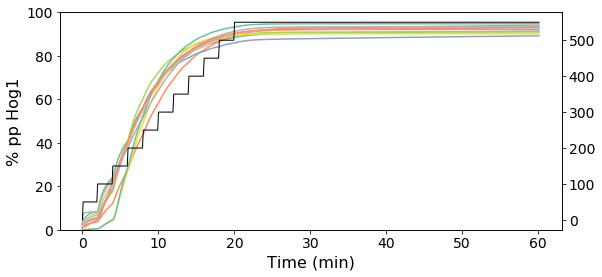

In [385]:
plotting.plt_man_behaviors_t100a(M2c_fxns, select_top_M2c_all[:10], 20, params_constants1, initials1, time, 2)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


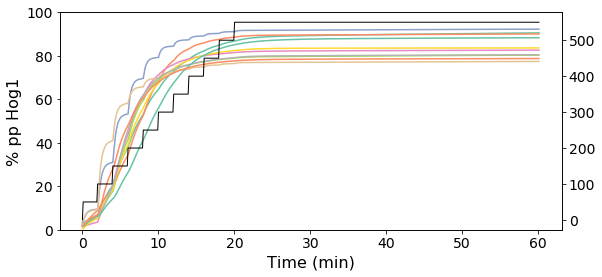

In [386]:
plotting.plt_man_behaviors_t100a(M4_fxns, select_top_M4[:10], 20, params_constants2, initials2, time, 2)

## M2c vs M2b - all

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[355022.5995487035, [150000, 0, 175000, 175000, 25000, 0, 0, 0, 0, 0]]


<Figure size 720x576 with 0 Axes>

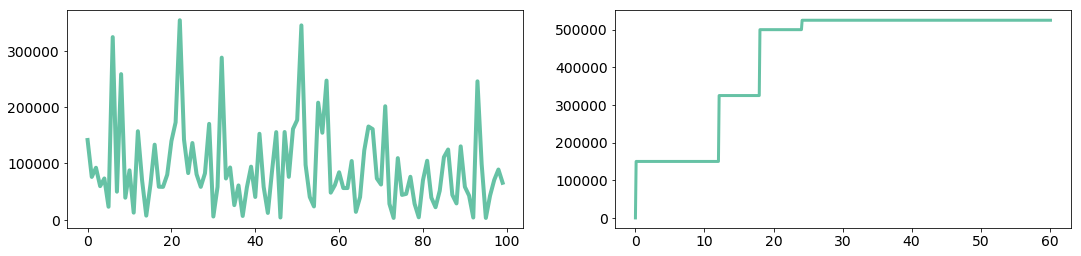

In [57]:
M2s, averages, mse_gen = ramp_optimization.get_differentiating_ramp(100, time, select_top_M2c_all[:5], M2c_fxns, initials1, params_constants1, 
                                           select_top_M2b_all[:5], M2b_fxns, initials1, params_constants1)

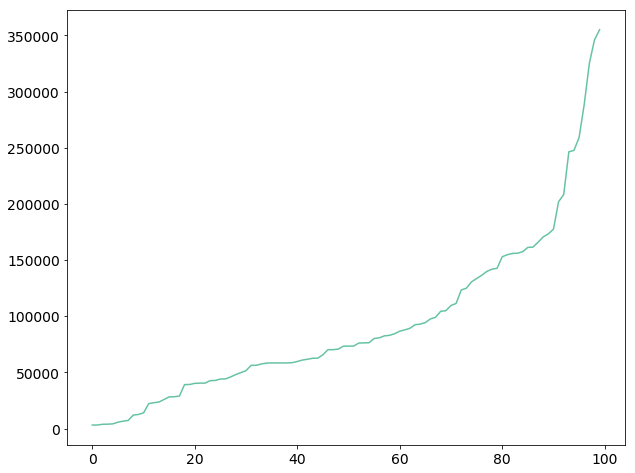

In [58]:
mses_for_fig4a = mse_gen.copy()
mses_for_fig4a = np.sort(mses_for_fig4a)
plt.plot(range(len(mses_for_fig4a)), mses_for_fig4a)
np.savetxt("C:/Users/sksuzuki/Documents/Research/figures/paper1/fig4/mses_ramp_gen_short.csv", mses_for_fig4a, delimiter=",")

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


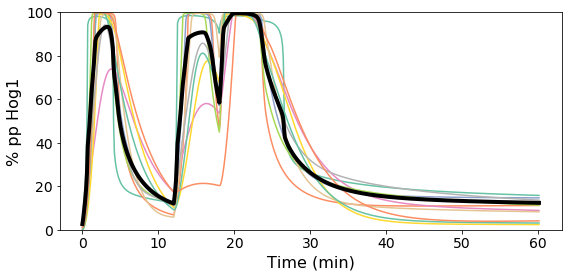

In [59]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 10, params_constants1, initials1, time,
                            M2s,averages[0],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


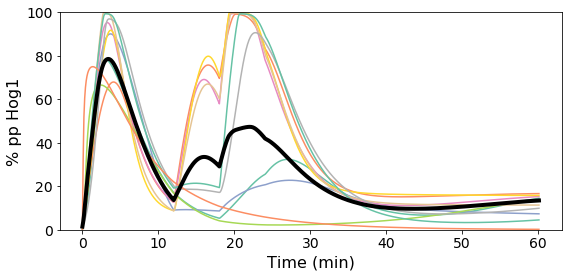

In [60]:
plotting.plt_rand_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants1, initials1, time,
                            M2s,averages[1],
                            save_fig='')

## M2c vs M2b responders - all

In [241]:
pops = {'responder' : [], 'non-responder' : []}
resp_idx = []
for i, params in enumerate(select_top_M2b_all[:10]):
    ss_data = model.run_ss(M2b_fxns.m, initials1, params_constants1, params)
    data = model.simulate_wt_experiment(M2b_fxns.m, ss_data, params_constants1, 0, params, time, run_type=['ramp'])
    active = data[:,2]/params_constants1[2]*100
    first_resp = 70#active[199]
    second_resp = active[201:301]
    if second_resp[second_resp>first_resp].any():
        pops['responder'].append(params)
        resp_idx.append(i)
    else:
        pops['non-responder'].append(params)
        
M2b_all_resp = pops['responder']

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


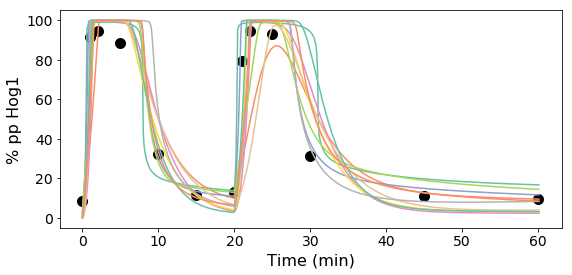

In [249]:
plotting.plt_ramp_behaviors(M2c_fxns, select_top_M2c_all[:5], 20, params_constants1, initials1, time, 2, hog1_ramp_data, mapk_ramp_time)

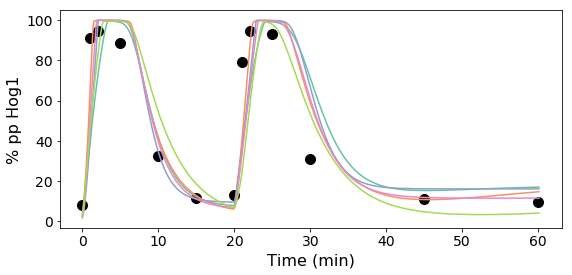

In [242]:
plotting.plt_ramp_behaviors(M2b_fxns, pops['responder'], 20, params_constants1, initials1, time, 2, hog1_ramp_data, mapk_ramp_time)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


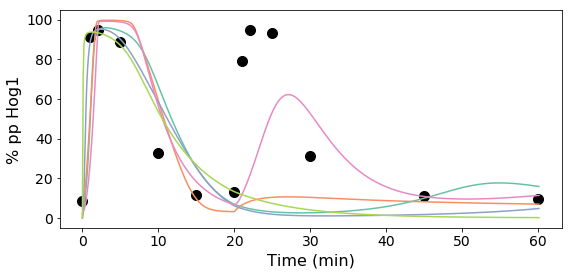

In [243]:
plotting.plt_ramp_behaviors(M2b_fxns, pops['non-responder'], 20, params_constants1, initials1, time, 2, hog1_ramp_data, mapk_ramp_time)

In [250]:
# ['responder' for  in [1,3,5,6,7,8,11,12,14]]
r = []
for x in range(len(select_top_M2b_all[:10])):
    if x in resp_idx: #idxes of responders
        r.append('responder')
    else:
        r.append('non-responder')
r

['non-responder',
 'responder',
 'non-responder',
 'responder',
 'non-responder',
 'responder',
 'responder',
 'non-responder',
 'responder',
 'non-responder']

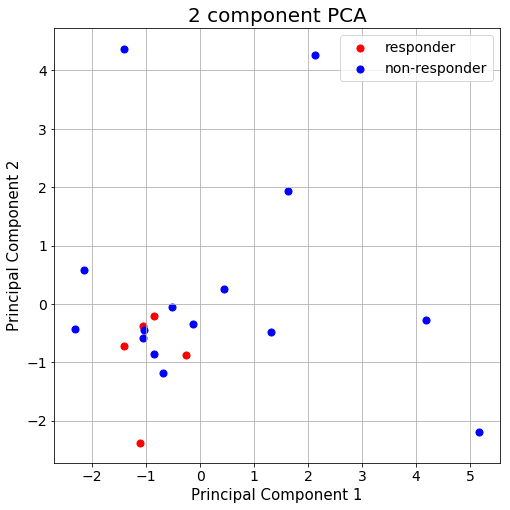

In [245]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pops_df = pd.DataFrame(df_top_params_M2b_all)
pops_df = StandardScaler().fit_transform(pops_df)

color_df = pd.DataFrame(r, columns = ['response'])

pca = PCA(n_components=2)
pcs = pca.fit_transform(pops_df)
principalDf = pd.DataFrame(data = pcs, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, color_df['response']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['responder', 'non-responder']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['response'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[66677.51198066754, [100000, 350000, 75000, 0, 0, 0, 0]]


<Figure size 720x576 with 0 Axes>

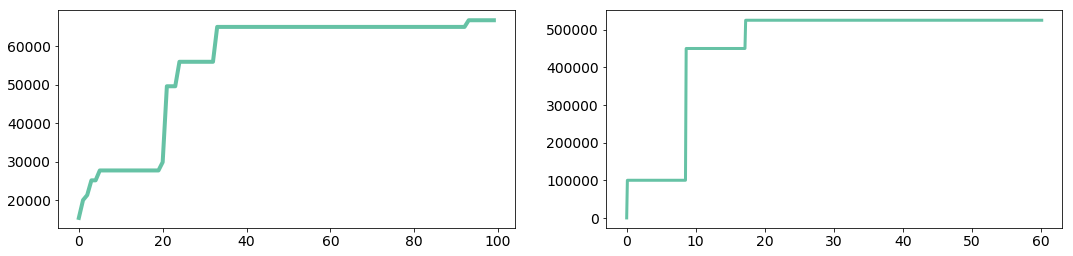

In [246]:
M2s_resp, averages_resp = ramp_optimization.get_differentiating_ramp(500, time, select_top_M2c_all[:10], M2c_fxns, initials1, params_constants1, 
                                           M2b_all_resp, M2b_fxns, initials1, params_constants1)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


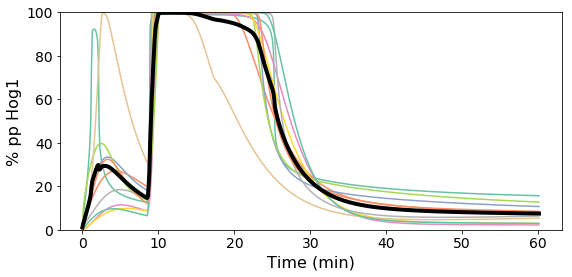

In [247]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all[:10], 10, params_constants1, initials1, time,
                            M2s_resp,averages_resp[0],
                            save_fig='')

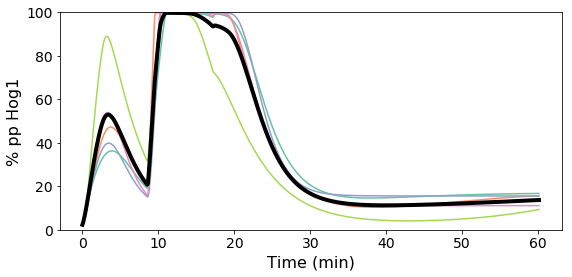

In [248]:
plotting.plt_rand_behaviors(M2b_fxns, M2b_all_resp, 10, params_constants1, initials1, time,
                            M2s_resp,averages_resp[1],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)


[82114.74084211283, [100000, 150000, 0, 125000, 0, 0]]


<Figure size 720x576 with 0 Axes>

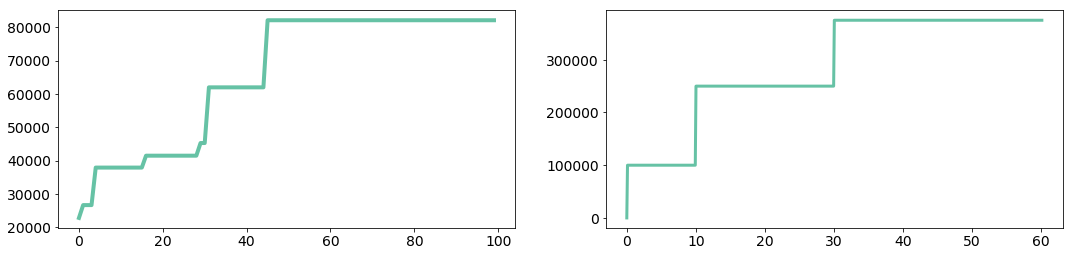

In [151]:
M2s_resp2, averages_resp2 = ramp_optimization.get_differentiating_ramp(100, time, select_top_M2c_all, M2c_fxns, initials1, params_constants1, 
                                           M2b_all_resp, M2b_fxns, initials1, params_constants1)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


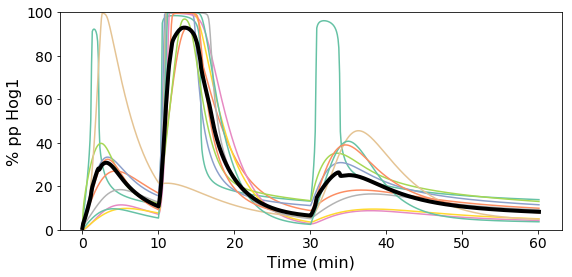

In [153]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 10, params_constants1, initials1, time,
                            M2s_resp2,averages_resp2[0],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)


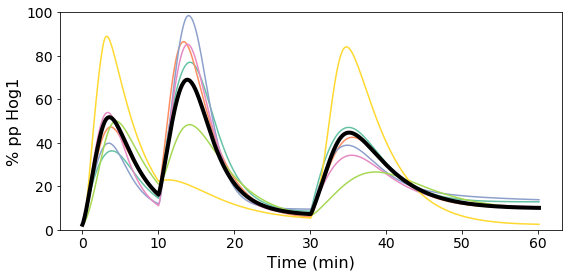

In [152]:
plotting.plt_rand_behaviors(M2b_fxns, M2b_all_resp, 10, params_constants1, initials1, time,
                            M2s_resp2,averages_resp2[1],
                            save_fig='')

## M2c vs M2b - Hog1

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[6112.3194536973, [50000, 0, 0, 0, 25000, 0, 0, 0, 0, 0]]


<Figure size 720x576 with 0 Axes>

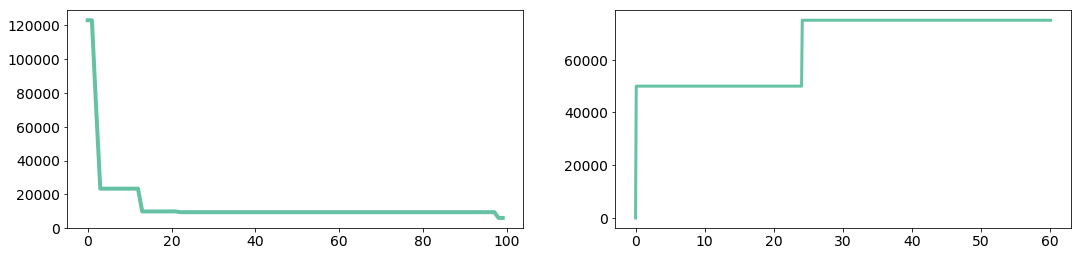

In [108]:
M2s_hog1, averages_hog1 = ramp_optimization.get_differentiating_ramp(100, time, select_top_M2c_hog1, M2c_fxns, initials1, params_constants1, 
                                           select_top_M2b_hog1, M2b_fxns, initials1, params_constants1)

In [ ]:
plotting.plt_rand_behaviors(M2b_fxns, select_top_M2b_all, 10, params_constants1, initials1, time,
                            M2s_hog1,averages_hog1[1],
                            save_fig='')

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


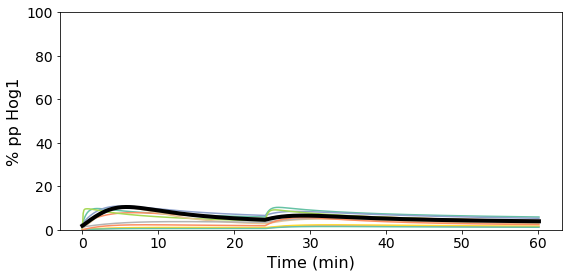

In [111]:
plotting.plt_rand_behaviors(M2c_fxns, select_top_M2c_all, 10, params_constants1, initials1, time,
                            M2s_hog1,averages_hog1[0],
                            save_fig='')

# No positive feedback

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

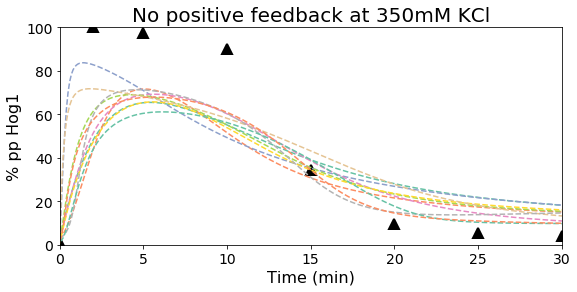

In [423]:
plotting.plt_nopos(M4_fxns, select_top_M4, 10, params_constants2, initials2, mapk_wt_data[4], mapk_time, 350000)

C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The number of calls to function has reached maxfev = 1000.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


<Figure size 720x576 with 0 Axes>

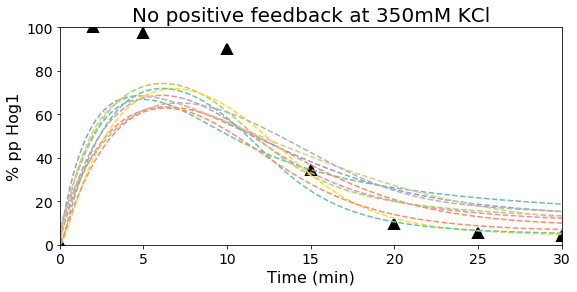

In [422]:
plotting.plt_nopos(M2c_fxns, select_top_M2c_all, 10, params_constants1, initials1, mapk_wt_data[4], mapk_time, 350000)

# Compare Models

In [40]:
def change_param(param_set, idx):
    param_sets = []
#     print(param_set[idx])
    for i in np.logspace(-4,4,8):
        new_param_set = param_set.copy()
#         print(i)
#         print(new_param_set[idx])
        new_param_set[idx] = new_param_set[idx]*i
#         print(new_param_set[idx])
        param_sets.append(new_param_set)
    return param_sets

In [165]:
b3 = change_param(best_fit, 0)
a1 = change_param(best_fit, 1)
a2 = change_param(best_fit, 2)
kb = change_param(best_fit, 3)
k1 = change_param(best_fit, 4)
k3 = change_param(best_fit, 5)
k5 = change_param(best_fit, 6)
s7 = change_param(best_fit, 7)
k9 = change_param(best_fit, 8)
k2 = change_param(best_fit, 9)
k4 = change_param(best_fit, 10)
d8 = change_param(best_fit, 11)
K1 = change_param(best_fit, 12)
K3 = change_param(best_fit, 13)
K5 = change_param(best_fit, 14)
K9 = change_param(best_fit, 15)
K2 = change_param(best_fit, 16)
K4 = change_param(best_fit, 17)
K6 = change_param(best_fit, 18)
K10 = change_param(best_fit, 19)
pPTP= change_param(best_fit, 20)

<Figure size 864x576 with 0 Axes>

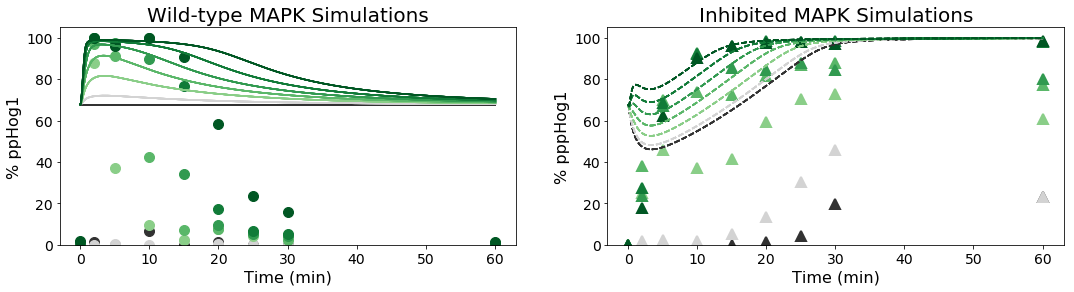

In [256]:
plt_param_behaviors(pPTP, 10, params_constants, initials, 5000, doses, time, 2, mapk_wt_data, mapk_t100a_data, mapk_time)

<Figure size 864x576 with 0 Axes>

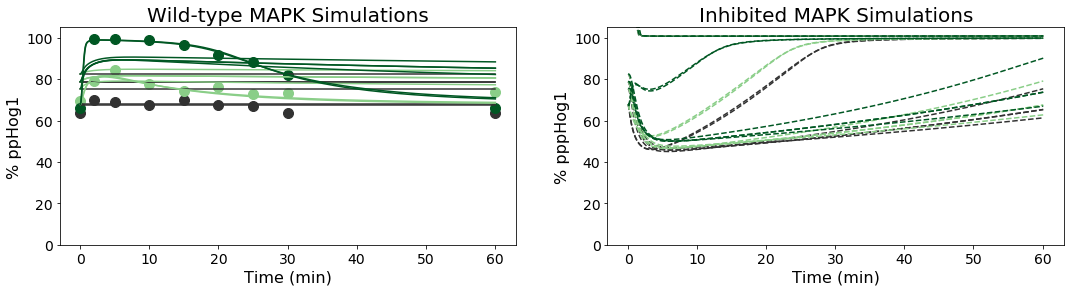

In [257]:
plt_param_behaviors_consts_diff(pPTP, 10, consts_diff, initials, 5000, [0]+map2k_doses, time, 2, mapk_ptp_data, None, mapk_time)

## Calculate Ttest

In [39]:
from scipy.stats import ttest_ind
ttest = ttest_ind(df_top_params_ptp23, df_df_top_params_all, axis=0)
print(ttest)

Ttest_indResult(statistic=array([ 2.39679427, -2.79229073, -1.32267715,  1.35465514, -0.54118825,
        1.7618635 , -1.96711273, -0.65253951, -2.92496233, -1.32407551,
        1.11084685,  3.27659218, -2.54644332, -0.51225341, -0.5430844 ,
       -0.64036423, -0.88305972, -0.81891478, -0.58938274,  5.35936213,
       13.22090904]), pvalue=array([1.73831097e-02, 5.69868390e-03, 1.87328616e-01, 1.76929721e-01,
       5.88930435e-01, 7.94939813e-02, 5.04386338e-02, 5.14740687e-01,
       3.80914011e-03, 1.86864583e-01, 2.67857974e-01, 1.22241783e-03,
       1.15725799e-02, 6.08992243e-01, 5.87626541e-01, 5.22608326e-01,
       3.78176751e-01, 4.13729348e-01, 5.56214849e-01, 2.11972735e-07,
       1.08039792e-29]))


Tukey's test (honing in on two comparisons of the group) for ANOVA (summary statistic comparing all of the groups) correcting for multiple testing https://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/

## Calculate score

In [290]:
hog1_doses = [0, 50000, 150000, 250000, 350000, 450000, 550000]
pbs2_doses = [150000, 550000]
ptp_doses = [0, 150000, 550000]

for params in top_params_a1_1D[:10]:
    print(scorefxn(initials, params_constants, params))

[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0, 2, 5, 10, 15, 20, 25, 30, 60]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.361472, 4.18506, 19.49207995, 23.08120093, 23.78618578, 22.3375094, 31.67199502, 36.30961501, 33.02963546, 34.87627365]


C:\Users\sksuzuki\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


ValueError: operands could not be broadcast together with shapes (9,) (15,) 